In [2]:
import matplotlib.pyplot as plt
import cv2, os
from function.converse_label import get_label
from PIL import Image
from keras.preprocessing.image import img_to_array
import numpy as np
train_data = []
train_labels = []
label, category = get_label('labelByHand.csv')
print(label)
print(category)
path = 'data'
for i, folderName in enumerate(os.listdir(path)):
    print("folder:", folderName)
    if folderName[0] != ".":
        for file_name in os.listdir(os.path.join(path, folderName)):
            if file_name == "train":
                for image in os.listdir(os.path.join(path, folderName, file_name)):
                    if image[0] != '.':
                        img = Image.open(os.path.join(path, folderName, file_name, image))
                        img = img.resize((50,50))
                        #plt.imshow(img)
                        train_data.append(img_to_array(img))
                        labels = [0 for j in range(category)]
                        labels[label[i]] = 1
                        train_labels.append(labels)
train_data = np.array(train_data)/255
train_labels = np.array(train_labels)
print("end")

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 1, 10, 11, 12, 12, 13, 14, 15, 14, 16, 17, 1, 18, 19, 2, 20, 14, 21, 8, 20, 22, 22, 22, 23, 24, 25, 26, 20, 27, 28, 29, 30]
31
folder: 01
folder: 02
folder: 03
folder: 04
folder: 05
folder: 06
folder: 07
folder: 08
folder: 09
folder: 10
folder: 11
folder: 12
folder: 13
folder: 14
folder: 15
folder: 16
folder: 17
folder: 18
folder: 19
folder: 20
folder: 21
folder: 22
folder: 23
folder: 24
folder: 25
folder: 26
folder: 27
folder: 28
folder: 29
folder: 30
folder: 31
folder: 32
folder: 33
folder: 34
folder: 35
folder: 36
folder: 37
folder: 38
folder: 39
folder: 40
folder: 41
folder: 42
end


In [7]:
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (3,3), input_shape = (50, 50, 3), activation = 'relu'))
model.add(Conv2D(filters = 32, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(Conv2D(filters = 128, kernel_size = (3,3), activation = 'relu'))
model.add(MaxPooling2D(pool_size = (2, 2)))
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(512, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation = 'relu'))
model.add(Dropout(0.4))
model.add(Dense(category, activation = 'sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['acc'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 32)        896       
                                                                 
 conv2d_7 (Conv2D)           (None, 46, 46, 32)        9248      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 23, 23, 32)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 23, 23, 32)        0         
                                                                 
 conv2d_8 (Conv2D)           (None, 21, 21, 64)        18496     
                                                                 
 conv2d_9 (Conv2D)           (None, 19, 19, 64)        36928     
                                                      

In [8]:
from function.solve_cudnn_error import *

solve_cudnn_error()

Physical devices cannot be modified after being initialized


In [9]:
from tensorflow.keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping
print(train_data.shape)
x_train, x_test, y_train, y_test = train_test_split(train_data, train_labels, test_size = 0.2, shuffle = True)
x_test.shape
early_stopping = EarlyStopping(monitor = 'val_loss', patience = 50, verbose = 1)
history = model.fit(x_train, y_train, epochs = 500, batch_size = 128, verbose = 1, validation_data = (x_test, y_test), callbacks = [early_stopping])

(12598, 50, 50, 3)
Epoch 1/500
79/79 [==============================] - 4s 44ms/step - loss: 3.1967 - acc: 0.0967 - val_loss: 2.9920 - val_acc: 0.1504
Epoch 2/500
79/79 [==============================] - 3s 37ms/step - loss: 2.6605 - acc: 0.1728 - val_loss: 2.1093 - val_acc: 0.3139
Epoch 3/500
79/79 [==============================] - 3s 37ms/step - loss: 1.9815 - acc: 0.3306 - val_loss: 1.5254 - val_acc: 0.4504
Epoch 4/500
79/79 [==============================] - 3s 38ms/step - loss: 1.5005 - acc: 0.4613 - val_loss: 1.0913 - val_acc: 0.5833
Epoch 5/500
79/79 [==============================] - 3s 36ms/step - loss: 1.1239 - acc: 0.5725 - val_loss: 0.7446 - val_acc: 0.7115
Epoch 6/500
79/79 [==============================] - 3s 36ms/step - loss: 0.8648 - acc: 0.6652 - val_loss: 0.5872 - val_acc: 0.7647
Epoch 7/500
79/79 [==============================] - 3s 37ms/step - loss: 0.6987 - acc: 0.7316 - val_loss: 0.4698 - val_acc: 0.8198
Epoch 8/500
79/79 [==============================] - 3s 3

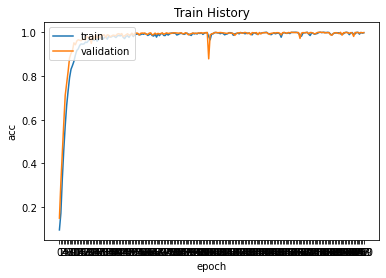

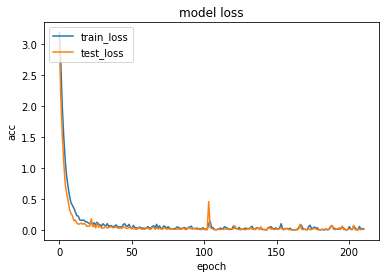

In [10]:
import matplotlib.pyplot as plt
def show_train_history(train_history):
    plt.plot(train_history.history['acc'])
    plt.plot(train_history.history['val_acc'])
    plt.xticks([i for i in range(0, len(train_history.history['acc']))])
    plt.title('Train History')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
    plt.show()
def show_model_loss(train_history):
    plt.plot(train_history.history['loss'])
    plt.plot(train_history.history['val_loss'])
    plt.title('model loss')
    plt.ylabel('acc')
    plt.xlabel('epoch')
    plt.legend(['train_loss', 'test_loss'], loc = 'upper left')
    plt.show()
show_train_history(history)
show_model_loss(history)

In [12]:
from keras.models import model_from_json
from keras.models import load_model
from tensorflow.keras import models
#model.save('model/model.h5')
model.save_weights('model/model.weight')
model.save_weights('model/model_weights.h5')
model.save('model/model.h5')
models.save_model(model, 'model/new_pb')
model.save('model/newpb.pb')
#models.save(model, 'model/newpb.pb')

INFO:tensorflow:Assets written to: model/new_pb\assets
INFO:tensorflow:Assets written to: model/newpb.pb\assets


In [6]:
score = model.evaluate(x_test, y_test, verbose = 0)
print(score)

[0.014127837494015694, 0.9960317611694336]


In [ ]:
test_data = []
path = 'test'
for file_name in os.listdir(path):
    if file_name.endswith('.PNG'):
        img = Image.open(os.path.join(path, file_name))
        img = img.resize((50,50))
        test_data.append(img_to_array(img))
test_data = np.array(test_data)/255
len(test_data)

In [ ]:
pred = model.predict(test_data)
pred = np.argmax(pred, axis = -1)
print(pred)